# CV Lab Assignment-1

### Importing the required libraries.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Importing the Images using wget.

In [2]:
!wget "https://raw.githubusercontent.com/XXDIL/Computer-Vision/main/images/cat.png"
!wget "https://raw.githubusercontent.com/XXDIL/Computer-Vision/main/images/ninja.png"

--2021-01-20 23:46:59--  https://raw.githubusercontent.com/XXDIL/Computer-Vision/main/images/cat.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.140.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.140.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161642 (158K) [image/png]
Saving to: ‘cat.png’

cat.png             100%[===================>] 157.85K  --.-KB/s    in 0.04s   

2021-01-20 23:47:00 (4.23 MB/s) - ‘cat.png’ saved [161642/161642]

--2021-01-20 23:47:00--  https://raw.githubusercontent.com/XXDIL/Computer-Vision/main/images/ninja.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.140.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.140.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125552 (123K) [image/png]
Saving to: ‘ninja.png’

ninja.png           100%[===================>] 122.61K  --.-KB/s    

### Utility Functions

In [3]:
def imgplot(og_img, new_img, text):
    '''
    A utility function to print the images.

    parms : og_img  : original image
          new_img : changed image
          text    : heading of the changed image

    return : None
    '''    

    plt.figure(figsize=(12,12))

    plt.subplot(2,2,1)
    plt.imshow(cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB))
    plt.title("Original")

    plt.subplot(2,2,2)
    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
    plt.title(text)

    plt.show()

## Question 1

Read and write the dimensions of an image (any image).

In [4]:
# importing tha image
img = cv2.imread("cat.png")

# printing the dimentions of img.
print(img.shape)

(340, 348, 3)


## Question 2

Perform following operations on an image:

a) Grayscale conversion.

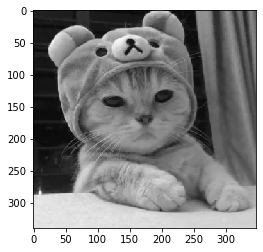

In [5]:
# part a
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap="gray")
plt.show()

b) Find the index of pixels having value equal to 6 in both images.

In [6]:
# part b
# taking a new image as the initial in=mage dint have a pixel value less than 9.
img = cv2.imread("ninja.png", 0)

cord_of_pixels_6 = np.where(img == 6)
print("There are", len(cord_of_pixels_6[0]), "pixels with the value = 6")

# these are the coordinates
cord_of_pixels_6

print("Test :", img[cord_of_pixels_6[0][0], cord_of_pixels_6[1][0]])

There are 258 pixels with the value = 6
Test : 6


c) Identify and display the value of darkest pixel in both the images.

In [7]:
# part c
print("Darkest pixel value = ", np.min(img_gray))

Darkest pixel value =  9


d) Modify the above image by replacing the square (31x31) around darkest pixel with the white pixels.

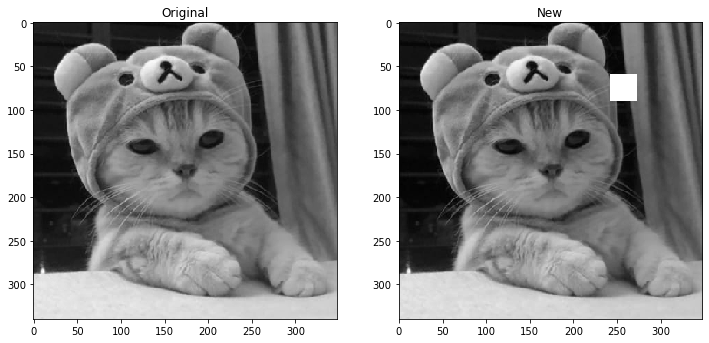

In [8]:
# part d
x, y = np.where(img_gray==9)

new_img = np.copy(img_gray)

x[0], y[0]

new_img[x[0]-15 : x[0]+16, y[0]-15:y[0]+16] = 255*np.ones((31,31))

# plotting the image
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(new_img, cmap="gray")
plt.title("New")

plt.show()

e) In the above image (2 d), make a gray square with pixel value 100 at the center of this image.

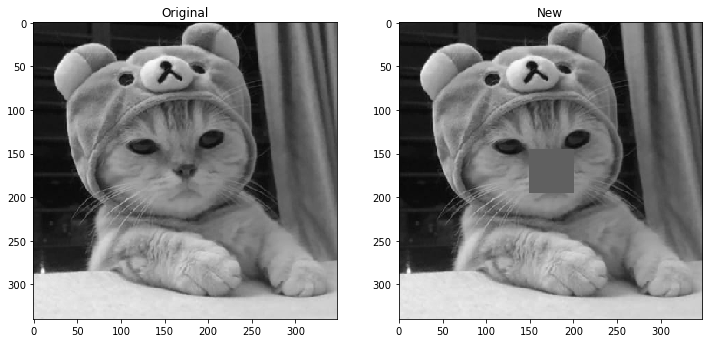

In [9]:
# part e
new_img2 = np.copy(img_gray)

# gray square of shape = (51, 51) with value = 100
gray_square = 100*np.ones((51, 51))

midx, midy = new_img2.shape[0]//2, new_img2.shape[1]//2
new_img2[midx-25:midx+26, midy-25:midy+26] = gray_square

# plotting the image
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original")

plt.subplot(2,2,2)
plt.imshow(new_img2, cmap="gray")
plt.title("New")

plt.show()

## Question 3

Compute the average pixel value for each channel R, G, and B then subtract the average value per channel for the above image ( used in q1).

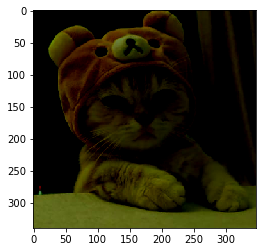

In [10]:
img = cv2.imread("cat.png")

# calculating the average
avgR = np.mean(img[:,:,2])
avgG = np.mean(img[:,:,1])
avgB = np.mean(img[:,:,0])

# subtracting the avg value from eavch channel
def my_subtract(A, val):
    h, w = A.shape[:2]
    for i in range(h):
        for j in range(w):
            new = A[i,j] - val
            if(new < 0):
                new = 0
            if(new > 255):
                new = 255
                
            A[i,j] = new
            
    return A

my_subtract(img[:,:,0], avgB)

img[:,:,0] = my_subtract(img[:,:,0], avgB)
img[:,:,1] = my_subtract(img[:,:,1], avgG)
img[:,:,2] = my_subtract(img[:,:,2], avgR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray")
plt.show()

## Question 4

Perform basic transformation on an image: Apply padding in case of loss of data.

A) Rotation 30 degree

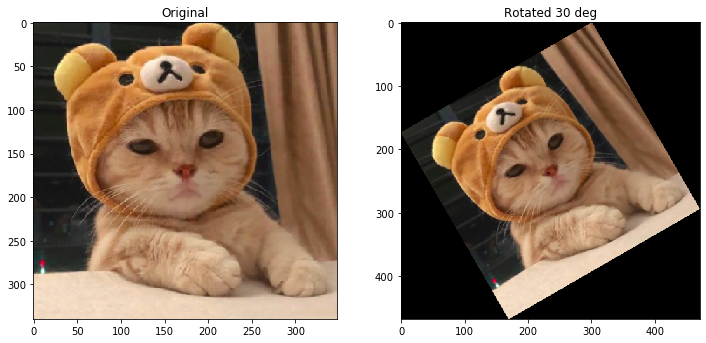

(468, 471, 3)


In [11]:
# part a
img = cv2.imread("cat.png")
(h, w) = img.shape[:2]
image_center = (w//2, h//2)

rot_mat = cv2.getRotationMatrix2D((w/2, h/2), 30, 1.0)
cos = np.abs(rot_mat[0, 0])
sin = np.abs(rot_mat[0, 1])

nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

rot_mat[0, 2] += (nW / 2) - image_center[0]
rot_mat[1, 2] += (nH / 2) - image_center[1]

result = cv2.warpAffine(img, rot_mat, (nW, nH))

# plotting the image
imgplot(img, result, "Rotated 30 deg")

print(result.shape)

B) Scaling by factor 2

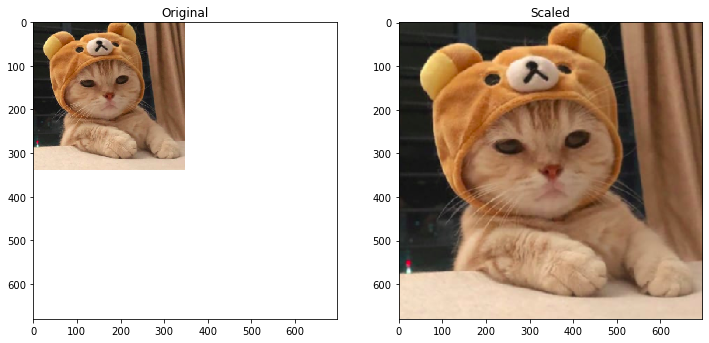

initial image shape =  (340, 348, 3)
Scaled image shape =  (680, 696, 3)


In [12]:
# part b
scaled = cv2.resize(img, (0, 0), fx = 2, fy = 2)
h, w = scaled.shape[:2]

# plotting the image
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.xlim(0, w)
plt.ylim(h, 0)

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB))
plt.title("Scaled")

plt.show()

print("initial image shape = ", img.shape)
print("Scaled image shape = ", scaled.shape)

C) Shifting (0,0) to (10, 10)

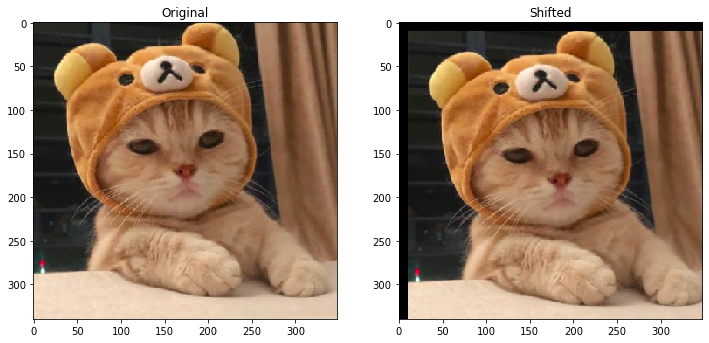

In [13]:
# part c
translation_matrix = np.array([[1,0,10],
                               [0,1,10]], dtype=np.float32)

img_translation = cv2.warpAffine(img, translation_matrix, (0, 0))

# plotting the image
imgplot(img, img_translation, "Shifted")

D) Filtering to detect edges.

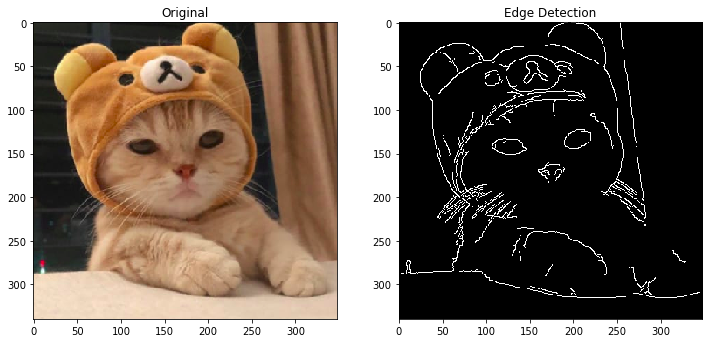

In [14]:
# part d
edges = cv2.Canny(img,100,250)

# plotting the image
imgplot(img, edges, "Edge Detection")